<a href="https://colab.research.google.com/github/RoetGer/decisions-under-uncertainty/blob/main/solved_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ex**: Assume 100 iid samples from a Poisson distribution with mean 1. What is the probabílity that the sum of samples is below 90?

Solution approach:

*   X_i ~ Pois(lambda)
*   Assume Y = sum(X_i)
*   Realize that Y = n*mean(X)
*   P(Y <= 90) = P(n*mean(X) <= 90) = P(mean(X) <= 90/n) 
*   Use central limit theorem to approximate distribution of mean(X), that is mean(X) ~ N(lambda, lambda/n)
*   P(sqrt(n)(mean(X) - lambda)/sqrt(lambda) <= sqrt(n)(90/n - lambda)/sqrt(lambda))



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import norm

plt.rc('figure', figsize=(12, 10))
plt.rc('font', size=12)

In [2]:
n = 100
val_to_compare = 90
pois_lambda = 1

stand_X = np.sqrt(n)*(1 - pois_lambda)/np.sqrt(pois_lambda)
stand_90 = np.sqrt(n)*(val_to_compare/n - pois_lambda)/np.sqrt(pois_lambda)

norm.cdf(stand_90, loc=0, scale=1)

0.15865525393145707

In [4]:
norm.cdf(0.9, loc=1., scale=np.sqrt(pois_lambda/n))

0.15865525393145707

In [5]:
norm.cdf(90, loc=n*pois_lambda, scale=np.sqrt(n*pois_lambda))

0.15865525393145707

Simulation study to test results ;)

In [6]:
samples = np.random.poisson(lam=1., size=(100000, n))
np.mean(samples.sum(axis=1) < 90)

0.14686

Difference can be explained that for the actual random variable of sum over the different samples, having a sum of 90 has a positive probability. In contrast, the CLT approximation assigns a probability of 0 to the event of observing 90. As the question asks for below 90, this leads to the difference, as the CDF evaluates X <= 90 instead of X < 90.

In [7]:
norm.cdf(89, loc=n*pois_lambda, scale=np.sqrt(n*pois_lambda))

0.13566606094638267

**Ex2**: Conduct a t-test in Python.

Assumptions 2-sample t-test:
* Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
* Data in each group must be obtained via a random sample from the population.
* Data in each group are normally distributed.
* Data values are continuous.
* The variances for the two independent groups are equal.

In [8]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
import seaborn as sns
np.random.seed(5)
samples_A = np.random.normal(size=n)
samples_B = np.random.normal(size=n, loc=1.)

df = pd.DataFrame({
    'Observations': np.concatenate([samples_A, samples_B]),
    'Group':  np.repeat(['A', 'B'], repeats=n)
})

Group
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Observations, dtype: object

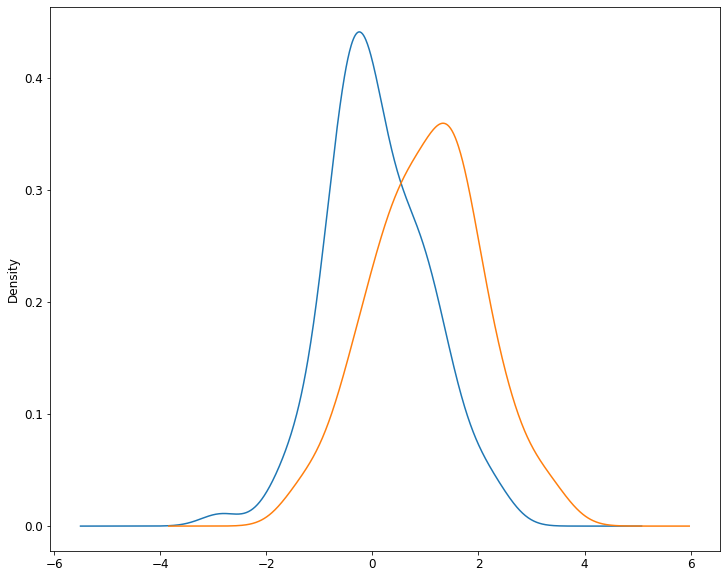

In [11]:
df.groupby('Group').Observations.plot.kde()

In [37]:
'''
Options for alternative-parameter:
'two-sided' (default): H1: difference in means not equal to value

'larger' :   H1: difference in means larger than value

'smaller' :  H1: difference in means smaller than value
'''

tval, pval, df = sm.stats.ttest_ind(samples_A, samples_B)
pval

8.297351792523914e-07

Ex: Conduct a 2 sample t-test with unequal variance (Welch t-test) in Python.

"
In statistics, Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the hypothesis that two populations have equal means. It is named for its creator, Bernard Lewis Welch, and is an adaptation of Student's t-test, and is more reliable when the two samples have unequal variances and/or unequal sample sizes"

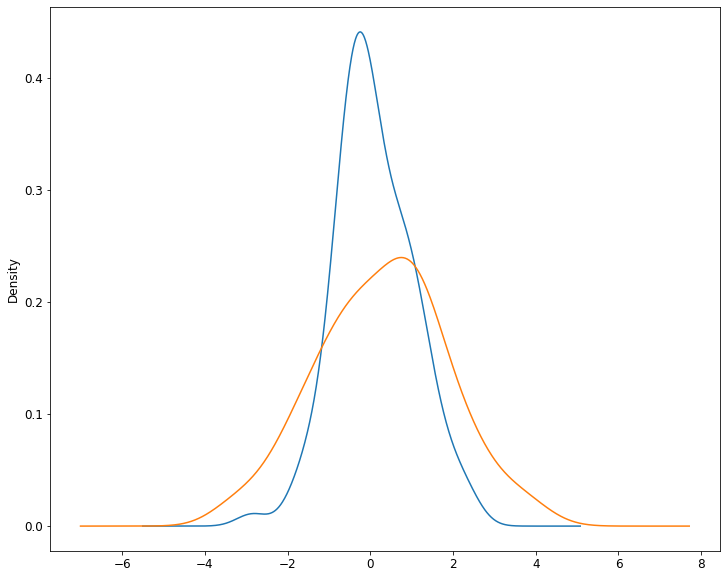

In [22]:
import seaborn as sns
np.random.seed(5)
samples_A = np.random.normal(size=n)
samples_B = np.random.normal(size=n, loc=0.25, scale=1.5)

df = pd.DataFrame({
    'Observations': np.concatenate([samples_A, samples_B]),
    'Group':  np.repeat(['A', 'B'], repeats=n)
})

df.groupby('Group').Observations.plot.kde();

In [21]:
# Assumption same variance
tval, pval, df = sm.stats.ttest_ind(samples_A, samples_B)
print('Same variance:', pval)

tval, pval, df = sm.stats.ttest_ind(samples_A, samples_B, usevar='unequal')
print('Different variance:', pval)

Same variance: 0.2738083098651565
Different variance: 0.27410098457197574


Ex: Conduct a test for difference in ratios in Python.

Ex: Conduct an equivalence test in Python

In [ ]:
??sm.stats.ttost_ind

Ex: Check whether a coin is unbiased (frequentist)

Ex: Check whether a coin is unbiased (Bayesian)

Ex: Run Chi-square independence test in Python

Ex: Run a Mann-Whitney-U-test in Python

**From statsmodels documentation**:

Statistics and tests for the probability that x1 has larger values than x2.

p is the probability that a random draw from the population of the first sample has a larger value than a random draw from the population of the second sample, specifically

p = P(x1 > x2) + 0.5 * P(x1 = x2)

This is a measure underlying Wilcoxon-Mann-Whitney’s U test, Fligner-Policello test and Brunner-Munzel test, and Inference is based on the asymptotic distribution of the Brunner-Munzel test. The half probability for ties corresponds to the use of midranks and make it valid for discrete variables.

The Null hypothesis for stochastic equality is p = 0.5, which corresponds to the Brunner-Munzel test.

Assumptions: 
* equal variance 
* or equal distribution under the Null hypothesis. 

Variants:
* Fligner-Policello test allows for unequal variances but assumes continuous distribution, i.e. no ties. 
* Brunner-Munzel extend the test to allow for unequal variance and discrete or ordered categorical random variables.

Brunner and Munzel recommended to estimate the p-value by t-distribution when the size of data is 50 or less. If the size is lower than 10, it would be better to use permuted Brunner Munzel test for the test of stochastic equality.


Scipy test alternatives:
The alternative hypothesis, H1, has to be one of the following:

  * 'two-sided' (default): H1: difference in means not equal to value
  * 'larger' :   H1: difference in means larger than value
  * 'smaller' :  H1: difference in means smaller than value

MannwhitneyuResult(statistic=405.0, pvalue=1.517061687331143e-29)

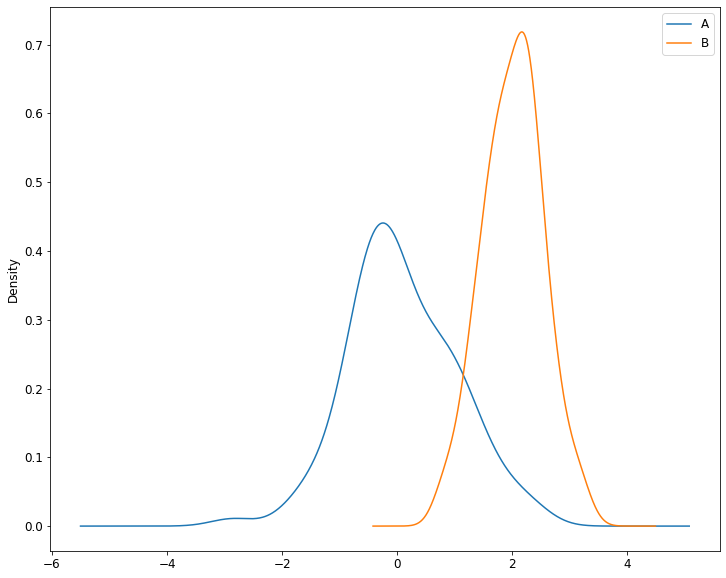

In [12]:
import scipy.stats as sps
import seaborn as sns

np.random.seed(5)
n = 100
samples_A = np.random.normal(size=n)
samples_B = np.random.normal(size=n, loc=2, scale=0.5)

df = pd.DataFrame({
    'Observations': np.concatenate([samples_A, samples_B]),
    'Group':  np.repeat(['A', 'B'], repeats=n)
})

df.groupby('Group').Observations.plot.kde(legend=True)

sps.mannwhitneyu(samples_A, samples_B, alternative='less') #ttest_ind(samples_A, samples_B)

In [1]:
import statsmodels.stats.api.n
statsmodels.stats.nonparametric

AttributeError: ignored

In [27]:
!pip install --upgrade statsmodels

     |████████████████████████████████| 9.5MB 3.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Ex: Run Wilcoxon test in Python

Ex: Run ANOVA in Python

Assumptions:

* **Normality** – That each sample is taken from a normally distributed population
* **Sample independence** – that each sample has been drawn independently of the other samples
* **Variance Equality** – That the variance of data in the different groups should be the same
* Your **dependent variable** should be **continuous** – e.g., measured on a scale which can be subdivided using increments (i.e. grams, milligrams)

In [4]:
import scipy.stats as sps

# From scipy's f_oneway documentation
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735,
             0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,
           0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

sps.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

Ex: Run Kruskal-Wallis in Python

Alternative to ANOVA, when its assumptions are violated.

Source: https://www.statisticshowto.com/kruskal-wallis/

* H0: Population median of all of the groups are equal
* H1: At least one median is different

Assumptions:
* One **independent variable** with **two or more levels** (independent groups). The test is more commonly used when you have three or more levels. For two levels, consider using the Mann Whitney U Test instead.
* **Ordinal scale, Ratio Scale or Interval scale** dependent variables.
* Your observations should be **independent**.
* All groups should have the **same shape distributions**.



In [5]:
sps.kruskal(tillamook, newport, petersburg, magadan, tvarminne)

KruskalResult(statistic=16.404810589080256, pvalue=0.0025214014537637097)

Ex: Create bootstrap confidence intervals in Python

Ex: Run permutation test in Python

Ex: Conduct a sample size computation for t-test